<a href="https://colab.research.google.com/github/n-o-r-y/Projects/blob/main/ML_Projects/Bangla_Online_Newspaper_News_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [ ]:
url1 = "/content/drive/MyDrive/NLP/csv/2020-03.csv"
df1 = pd.read_csv(url1, encoding = 'utf-8', encoding_errors = 'backslashreplace', sep=r'\s*,\s*')
df1 = df1.loc[:,['content','section']]
df1.head(5)

In [ ]:
df1.shape

(31731, 2)

In [ ]:
df1['section'].value_counts()

bangladesh            12215
sports                 4450
entertainment          2590
international          2377
northamerica           2162
opinion                1631
economy                1211
technology             1168
durporobash            1121
life-style              851
bondhushava             694
onnoalo                 296
education               290
we-are                  207
pachmisheli             167
chakri-bakri            100
nagorik-kantho           86
trust                    31
tarunno                  27
kishoralo                23
special-supplement       11
nagorik-sangbad          11
protichinta               7
mpaward1                  5
Name: section, dtype: int64

In [ ]:
sections = ['bangladesh','sports','entertainment','international','northamerica','opinion','economy']
df = df1[df1['section'].isin(sections)]
df.head(5)
#df['section'].value_counts()

,content,section
0,দর্শন-শিল্প-সাহিত্য-বিজ্ঞান চর্চার প্ল্যাটফর্ম...,northamerica
1,শুরু হলো নতুন বছর। সবার মতো তারকাদেরও আছে বছরজ...,entertainment
2,এই মুহূর্তে জালমে খলিলজাদ সম্ভবত সুখী মানুষ নন...,opinion
3,নেটফ্লিক্স অরিজিনালসের ‘বার্ড বক্স’ ছবিটি নিয়ে...,entertainment
4,নির্বাচনী আইন অনুযায়ী পর্যাপ্ত ভোট না পাওয়ায় স...,bangladesh


In [ ]:
df.dropna(inplace=True)
print(df.isnull().sum())
df.shape

content    0
section    0
dtype: int64


<ipython-input-6-7aecef95cef4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


(26565, 2)

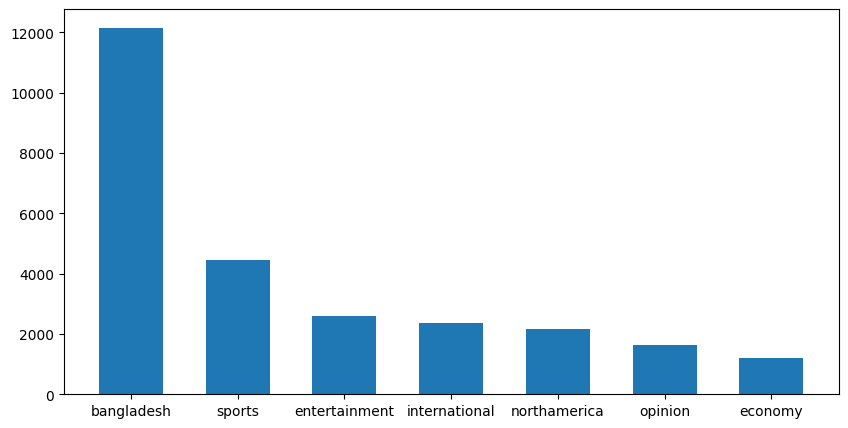

In [ ]:
x_axis = np.array(sections)
y_axis = df['section'].value_counts().values
plt.figure(figsize=(10,5))
plt.bar(x_axis,y_axis, width=0.6,align="center")
plt.show()

In [ ]:
X = df['content']
Y=df['section']

In [ ]:
from sklearn.preprocessing import LabelEncoder
Y = LabelEncoder().fit_transform(Y)
np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install -U bnlp_toolkit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 39.9 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171031 sha256=8520375429623a68a52676849a9558f2f5f8b67eb7b7c2363fdefadf8ece98c4
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [ ]:
#from bltk.langtools.banglachars import (vowels,vowel_signs,consonants,digits,operators,punctuations,others)
!pip3 install bnltk


  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2959 sha256=8a3c70b96826a23e8891b61e14f19d77344ec87ba203321eb6e58a57aa85dd05
  Stored in directory: /root/.cache/pip/wheels/aa/9c/60/f67813603a52fc35057868f1aba0003cc75b72583dcaa2c341
Successfully built sklearn


In [ ]:
from bnltk.stemmer import BanglaStemmer
bn_stemmer = BanglaStemmer()

In [ ]:
from bnlp import BengaliCorpus as remove


punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
sen = bn_stemmer.stem('যুগের')
sen

'যুগ'

In [ ]:
df['content'][15]

'• যুগের কলকাঠি নাড়ছেন ট্রাম্প. পুতিন. কিম ও যুবরাজ সালমানের মতো ব্যক্তিরা• কিছু ঘটনা নিশ্চিত ঘটবে ২০১৯ সালে• কিছু ঘটনা নিয়ে রয়েছে ধোঁয়াশা • যুগের কলকাঠি নাড়ছেন ট্রাম্প. পুতিন. কিম ও যুবরাজ সালমানের মতো ব্যক্তিরা• কিছু ঘটনা নিশ্চিত ঘটবে ২০১৯ সালে• কিছু ঘটনা নিয়ে রয়েছে ধোঁয়াশা বিশ্ব এখন লোকরঞ্জনবাদ ও সংরক্ষণবাদের। যুগের কলকাঠি নাড়ছেন ট্রাম্প. পুতিন. কিম ও যুবরাজ সালমানের মতো ব্যক্তিরা। কিছু ঘটনা নিশ্চিত ঘটবে ২০১৯ সালে। আর কিছু ঘটনা নিয়ে রয়েছে ধোঁয়াশা। তবু ভবিষ্যদ্বাণী। নতুন কংগ্রেস পাচ্ছে যুক্তরাষ্ট্র মার্কিন পার্লামেন্টের নিম্নকক্ষ প্রতিনিধি পরিষদে ২০১৮ সালে সংখ্যাগরিষ্ঠতা পায় ডেমোক্র্যাটরা। প্রতিনিধি পরিষদে সংখ্যাগরিষ্ঠতা অর্জনের পর দেশের ১১৬তম কংগ্রেসের সদস্যরা প্রথমবারের মতো মুখোমুখি হবেন ৩ জানুয়ারি। অর্থাৎ প্রেসিডেন্ট ডোনাল্ড ট্রাম্প নতুন মাত্রার বিরোধিতার মুখোমুখি হবেন বলে মনে করা হচ্ছে। মোদিই প্রধানমন্ত্রী থাকবেন? সম্প্রতি ভারতের পাঁচ রাজ্যের বিধানসভা নির্বাচনে ভরাডুবি ঘটেছে দিল্লিতে ক্ষমতাসীন দল বিজেপির। রাজস্থান ও ছত্তিশগড়ে নিরঙ্কুশ সংখ্যাগরিষ্ঠতা পেয়েছে কংগ্রেস। ধারণা করা হচ্ছ

In [ ]:
st_word = set(['com','he', 'ii', 'iii', 'the', 'www', 'দু', 'একটি','কমিয়ে', 'নিজের','মূলত','নিয়েছে', 'তারৈ', 'আমি', 'ঐ', 'আপনি', 'করিয়ে', 'তত', 'জন্য', 'যখন', 'হত', 'সেটাও', 'করার', 'ওঁদের', 'শুধু', 'তাহার', 'ওদের', 'দেওয়ার', 'নিজেই', 'আমার', 'দিলেন', 'ফিরে', 'গেলে', 'জানা', 'আপনার', 'তাঁর', 'উপর', 'তাকে', 'রয়েছে', 'যাকে', 'এঁরা', 'তাদের', 'সেই', 'হবেন', 'কোনও', 'অনুযায়ী', 'যান', 'তাও', 'পরেও', 'গেছে', 'অবধি', 'কয়েকটি', 'কাছে', 'এটি', 'আগেই', 'এতটাই', 'হইয়া', 'যা', 'হৈলে', 'আবার', 'তারা', 'সে', 'হয়েছে', 'সহিত', 'যাবে', 'তখন', 'গিয়েছে', 'দিয়ে', 'কিছুই', 'তবে', 'নিতে', 'রেখে', ' ই', 'সহ', 'যাঁরা', 'নানা', 'হলো', 'যাঁর', 'তোমার', 'পর', 'ছাড়াও', 'করলে', 'যত', 'তবু', 'তিনিও', 'না', 'দেখতে', 'দেওয়া', 'থেকেও', 'কাজে', 'ক্ষেত্রে', 'কয়েক', 'হচ্ছে', 'হয়েছিল', 'থেকেই', 'অথবা', 'সঙ্গেও', 'বদলে', 'দ্বারা', 'পক্ষে', 'গেল', 'বলতে', 'পাওয়া', 'কত', 'মধ্যে', 'বলা', 'জে', 'নেই', 'তাই', 'কি', 'সেটা', 'একে', 'যেখানে', 'এত', 'হলেও', 'টি', 'করেই', 'করছে', 'হন', 'প্রায়', 'মধ্যভাগে', 'কারণ', 'এবার', 'করেছে', 'করেন', 'আর', 'যেন', 'নিজেদের', 'হয়েই', 'নিজে', 'একবার', 'নাই', 'বাদে', 'যাতে', 'এর', 'ঠিক', 'তার', 'ও', 'পেয়ে', 'করলেন', 'মোট', 'ব্যাপারে', 'কাছ', 'করা', 'চেয়ে', 'কেউ', 'নাগাদ', 'করি', 'বলেছেন', 'নেওয়ার', 'কাউকে', 'ভাবে', 'দিকে', 'তারপর', 'যেমন', 'ওখানে', 'খুব\tগুলি', 'অর্থাত', 'তো', 'ছিলেন', 'কোন', 'পারেন', 'হয়তো', 'বরং', 'কেউই', 'জনকে', 'প্রভৃতি', 'দুটো', 'তাঁকে', 'এখন', 'অন্য', 'ওর', 'ছিল', 'ওকে', 'তুলে', 'দিয়েছে', 'জানানো', 'ওঁরা', 'এটাই', 'তুমি', 'করিতে', 'তাহলে', 'দেন', 'বলে', 'যে', 'হলেই', 'এমনকী', 'হল', 'বহু', 'বলল', 'মধ্যেই', 'ধরে', 'তাঁদের', 'তেমন', 'আই', 'হইবে', 'তাহাতে', 'নেওয়া', 'যিনি', 'এঁদের', 'অনেকে', 'হতে', 'কে', 'ধরা', 'হইতে', 'করায়', 'ব্যবহার', 'থাকে', 'বসে', 'থাকেন', 'থাকবে', 'স্বয়ং', 'এরা', 'দেয়', 'নিয়ে', 'কবে', 'সবার', 'দেখে', 'চলে', 'যেতে', 'ইত্যাদি', 'সেখান', 'চান', 'অন্তত', 'হবে', 'সেটাই''পর্যন্ত', 'মাধ্যমে', 'এমন', 'ভাবেই', 'দিয়েছেন', 'ওরা', 'করে', 'তাতে', 'এবং', 'এতে', 'ইহা', 'জন্যওজে', 'সুতরাং', 'আমাকে', 'বিশেষ', 'এসে', 'করতে', 'এখানেই', 'আমরা', 'কিন্তু', 'তিনি', 'বিনা', 'আজ', 'কারও', 'করিয়া', 'তা', 'ছাড়া', 'থেকে', 'যারা', 'হয়', 'হওয়া', 'এল', 'মাত্র', 'ফের', 'জানতে', 'জানিয়ে', 'বললেন', 'মতোই', 'সাথে', 'কর', 'করেছেন', 'করবেন', 'হলে', 'নাকি', 'সঙ্গে', 'আগামী', 'এখনও', 'তাঁাহারা', 'দিতে', 'তাঁরা', 'আগে', 'আমাদের', 'সেটি', 'বলেন', 'স্পষ্ট', 'কোনো', 'হোক', 'থাকবেন', 'জন', 'করছেন', 'অবশ্য', 'গিয়ে', 'হয়নি', 'এখানে', 'করবে', 'কিছু', 'হওয়ায়', 'কখনও', 'যাদের', 'বার', 'হয়ে', 'পারি', 'জানিয়েছে', 'আদ্যভাগে', 'আরও', 'মতো', 'যায়', 'যাওয়ার', 'কিংবা', 'যদি', 'পরেই', 'জনের', 'হিসাবে', 'এস', 'দুটি', 'জানায়', 'গোটা', 'যাওয়া', 'তথা', 'সমস্ত', 'যদিও', 'করাই', 'হতেই', 'হয়েছেন', 'নয়', 'বিভিন্ন\tবিষয়টি', 'রকম', 'অনেক', 'করেছিলেন', 'উপরে', 'এ', 'এদের', 'উনি', 'হয়', 'সব', 'পরে', 'প্রতি', 'যার', 'মধ্যেও', 'মোটেই', 'এই', 'বা', 'বেশ', 'পারে', 'যতটা', 'অনেকেই', 'যাচ্ছে', 'অথচ', 'অতএব', 'একই', 'দেখা', 'চায়', 'আছে', 'থাকায়', 'যথেষ্ট', 'কী', 'তাহা', 'রাখা', 'ওঁর', 'সেখানে', 'সম্প্রতি', 'তিনঐ', 'উচিত', 'হওয়ার', 'ফলে', 'ওই', 'কেন', 'থাকা', 'এটা'])


In [ ]:
'১২' in remove.digits

True

In [ ]:
#from bltk.langtools import remove_stopwords
#from bltk.langtools import Tokenizer
cnt = 0
corpus = []
for val in df['content']:
  sen = val
  #cnt+=1
  #if cnt == 10:
    break

  sentences = re.sub(r'\n{2,}|\n|।|,|\.', "", sen)

  words = sentences.split()
  words = [bn_stemmer.stem(word) for word in words]
  words = [word for word in words if word not in remove.punctuations]
  #words = [word for word in words if word not in remove.operators]
  words = [word for word in words if word not in remove.digits]
  words = [word for word in words if word not in st_word]
  words = [word for word in words if word not in remove.stopwords]

  #words=remove_stopwords(words,level='hard')
  line = " ".join(words)
  corpus.append(line)

len(corpus)

9

In [ ]:
corpus[0]

'দর্শন-শিল্প-সাহিত্য-বিজ্ঞান চর্চ প্ল্যাটফর্ম ‘পাঠশালা’র দশম আসর হ গ ১৫ ডিসেম্বর এগলিন্টন স্কয় টরন্টো পাবলিক লাইব্রেরি বিজ দিবস সামন সাজানো হ আসর আলোচক ছি মুক্তিযুদ্ধ-বিষয়ক চারণ-গবেষক মুক্তিযুদ্ধভিত্তিক সাহিত্য রচন ‘বাংলা একাডেমি পুরস্ক ২০১৫’ প্রাপ্ত লেখক তাজুল মোহাম্মদ উল্লেখ্য গত শতক আশির দশক শুরুর দিক অদ্যাবধি চ দশক ধর চারণ ম বাংলাদেশ অঞ্চল গি ক্ষেত্র অনুসন্ধান মাধ্যম মুক্তিযুদ্ধ তথ্য ইতিহাস তুল এন তাজুল মোহাম্মদ রচনা ৫৫ গ্রন্থ সিলেট বিভাগ মৌলভীবাজ জেল কুলাউড়া থান সাধনপুর গ্রাম জন্ম তাজুল মোহাম্ম শিক্ষা চাকরিজীবন বৃহত্তর সিলেটে ১৯৭১ দক্ষিণ কুলাউড়া সর্বদলী ছাত্র সংগ্রাম পরিষ সভাপতি কুলাউড়া ছাত্র ইউনিয়ন নেতৃস্থানী অবস্থান (৭৪-৭৭) সিলেট জেলা খেতমজুর সমিতির আহ্বায়ক কেন্দ্রী কমি সদস্য (৮২-৯২) বাংলাদেশ কমিউনিস্ট পার্ সিলেট জেলা কমি সদস্য (৮৪-৯২) বালাগঞ্জ উদীচীর সহসভাপতি খেলাঘর সিলেট জেলা কমি সহসভাপতি দুটোর জাতী পরিষ সদস্য তাজুল মোহাম্ম নেতৃত্ব সফল খেতমজুর আন্দোলন হ সিলেট এওলারটুক চারখা বালাগঞ্জ তাজুল বৃহত্তর সিলেট ইতিহাস প্রণয়ন পরিষদ প্রতিষ্ঠ অন্যতম উদ্যোক্তা ১৯৭১ মুক্তিযুদ্ধ তাজুল মোহাম্

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=8000,ngram_range=(1,3))
X = tv.fit_transform(corpus).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=10)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      3685
           1       0.82      0.48      0.61       380
           2       0.89      0.90      0.89       767
           3       0.77      0.73      0.75       714
           4       0.80      0.70      0.74       631
           5       0.65      0.40      0.50       475
           6       0.96      0.97      0.97      1318

    accuracy                           0.86      7970
   macro avg       0.82      0.73      0.77      7970
weighted avg       0.85      0.86      0.85      7970



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      3685
           1       0.95      0.25      0.40       380
           2       0.93      0.83      0.87       767
           3       0.85      0.50      0.63       714
           4       0.90      0.53      0.67       631
           5       0.80      0.29      0.43       475
           6       0.96      0.96      0.96      1318

    accuracy                           0.81      7970
   macro avg       0.88      0.62      0.69      7970
weighted avg       0.83      0.81      0.79      7970



In [ ]:
from sklearn import tree
tr=tree.DecisionTreeClassifier()
tr.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report

y_pred = tr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3685
           1       0.41      0.41      0.41       380
           2       0.70      0.72      0.71       767
           3       0.51      0.52      0.51       714
           4       0.53      0.57      0.55       631
           5       0.45      0.38      0.41       475
           6       0.87      0.86      0.87      1318

    accuracy                           0.73      7970
   macro avg       0.61      0.61      0.61      7970
weighted avg       0.73      0.73      0.73      7970



In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3685
           1       0.83      0.62      0.71       380
           2       0.91      0.90      0.91       767
           3       0.82      0.82      0.82       714
           4       0.86      0.74      0.79       631
           5       0.77      0.57      0.66       475
           6       0.97      0.97      0.97      1318

    accuracy                           0.89      7970
   macro avg       0.87      0.80      0.83      7970
weighted avg       0.89      0.89      0.89      7970



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


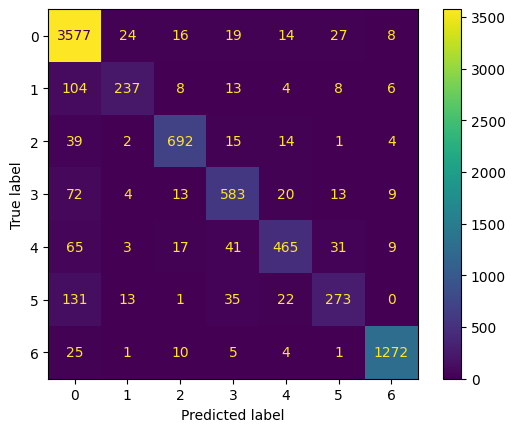

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred,labels=rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

In [ ]:
!pip install -U bnlp_toolkit


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus,Y, test_size=0.3, random_state=10)

In [ ]:
import tensorflow as tf
from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM

In [ ]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)
X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

210208

In [ ]:
sumlen=0
lens =  np.array([])
for i in range(len(X_train)):
  lens = np.append(lens,len(X_train[i]))

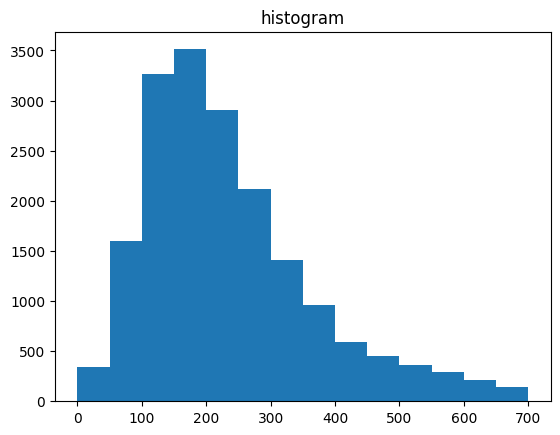

In [ ]:
from matplotlib import pyplot as plt
plt.hist(lens, bins = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700])
plt.title("histogram")
plt.show()

In [ ]:
len(X_train[0])

160

In [ ]:
from keras.utils import pad_sequences

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from bnlp import BengaliGlove
!wget https://huggingface.co/sagorsarker/bangla-glove-vectors/resolve/main/bn_glove.39M.300d.zip
!unzip bn_glove.39M.300d.zip -d bn_glove.300d

--2023-10-30 08:06:57--  https://huggingface.co/sagorsarker/bangla-glove-vectors/resolve/main/bn_glove.39M.300d.zip
Resolving huggingface.co (huggingface.co)... 18.172.134.24, 18.172.134.4, 18.172.134.88, ...
Connecting to huggingface.co (huggingface.co)|18.172.134.24|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/aa/54/aa548a31e1afcb96a938d527a7a3914d612289d4eec18ddd467509e7f2f37969/fd42e9761237bde6f9a0d2acf815e0bc1632902365657d0fa35a95fc880a1ab1?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27bn_glove.39M.300d.zip%3B+filename%3D%22bn_glove.39M.300d.zip%22%3B&response-content-type=application%2Fzip&Expires=1698912417&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTY5ODkxMjQxN319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy9hYS81NC9hYTU0OGEzMWUxYWZjYjk2YTkzOGQ1MjdhN2EzOTE0ZDYxMjI4OWQ0ZWVjMThkZGQ0Njc1MDllN2YyZjM3OTY5L2ZkNDJlOTc2MTIzN2JkZTZm

In [ ]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/bn_glove.300d/bn_glove.39M.300d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
cnt=0
embedding_matrix = zeros((vocab_length,300))
for word,index in word_tokenizer.word_index.items():
  embedding_vector = embeddings_dictionary.get(word)
  if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
  else:
        cnt=cnt+1

In [ ]:
from bnlp.embedding.fasttext import BengaliFasttext


In [ ]:
from bnlp.embedding.fasttext import BengaliFasttext

bft = BengaliFasttext()

word = "গ্রাম"
word_vector = bft.get_word_vector(word)
print(word_vector.shape)

NameError: ignored

In [ ]:
dic = dict()
for word in bft.model.words:
  dic[word] = bft.model.get_word_vector(word)

In [ ]:
snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 300, weights=[embedding_matrix], input_length=200 , trainable=True)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))

In [ ]:
snn_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['acc'])

print(snn_model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 200, 300)          63062400  
                                                                 
 flatten_8 (Flatten)         (None, 60000)             0         
                                                                 
 dense_8 (Dense)             (None, 1)                 60001     
                                                                 
Total params: 63,122,401
Trainable params: 63,122,401
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
snn_model_history=snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.3)


Epoch 1/6
102/102 [==============================] - 78s 762ms/step - loss: 0.0000e+00 - acc: 0.0461 - val_loss: 0.0000e+00 - val_acc: 0.0457
Epoch 2/6
 86/102 [========================>.....] - ETA: 12s - loss: 0.0000e+00 - acc: 0.0437

KeyboardInterrupt: ignored

In [ ]:
cnt

125596

In [ ]:
X_train.shape

150

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Tokenize each text document
tokenized_documents = [word_tokenize(document) for document in corpus]

In [ ]:
len(tokenized_documents)

26565

In [ ]:
from bnlp import Word2VecTraining
trainer = Word2VecTraining()

data_file = tokenized_documents # or you can pass custom sentence tokens as list of list
model_name = "myModel.model"
vector_name = "my_vector.vector"
trainer.train(data_file, model_name, vector_name, epochs=5)

training started.......
please wait.....it will take time according to your data size and computation capability
train completed successfully
trianing loss: 18056306.0
model and vector saving...
model and vector saved as myModel.model and my_vector.vector


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus,Y, test_size=0.3, random_state=10)

In [ ]:
import tensorflow as tf
from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM

In [ ]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)
X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

174395

In [ ]:
from keras.utils import pad_sequences

maxlen = 1550

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/my_vector.vector', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    print(word)
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
cnt=0
embedding_matrix = zeros((vocab_length,100))
for word,index in word_tokenizer.word_index.items():
  embedding_vector = embeddings_dictionary.get(word)
  if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
  else:
        cnt=cnt+1

In [ ]:
snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=1550 , trainable=True)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))

In [ ]:
snn_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['acc'])

print(snn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1550, 100)         17439500  
                                                                 
 flatten (Flatten)           (None, 155000)            0         
                                                                 
 dense (Dense)               (None, 1)                 155001    
                                                                 
Total params: 17594501 (67.12 MB)
Trainable params: 17594501 (67.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
snn_model_history=snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.3)


Epoch 1/6
  3/102 [..............................] - ETA: 43s - loss: 0.0000e+00 - acc: 0.0365

KeyboardInterrupt: ignored

In [ ]:
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=True)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='softmax'))

NameError: ignored

In [ ]:
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1550, 100)         21020800  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 21138177 (80.64 MB)
Trainable params: 21138177 (80.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=2, verbose=1, validation_split=0.3)

Epoch 1/2
102/102 [==============================] - 30s 253ms/step - loss: 0.0000e+00 - acc: 0.0490 - val_loss: 0.0000e+00 - val_acc: 0.0457
Epoch 2/2
102/102 [==============================] - 23s 227ms/step - loss: 0.0000e+00 - acc: 0.0440 - val_loss: 0.0000e+00 - val_acc: 0.0457
